<a href="https://colab.research.google.com/github/TashreefMuhammad/University_Miscellaneous_Codes/blob/main/Minimum_Distance_to_Class_Mean_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='yellow'>**CSE 4214 | Pattern Lab | Assignment 1**</font>

## Adding Files

Adding training and testing files to the *Notebook*

### Downloading from Drive

The following cell will directly downlod the files from drive and add it to the location files part in Colaboratory.

In [ ]:
# Downloading Training File from the following link
# https://drive.google.com/file/d/1GbUKjliP_Cy95zx-NNKot7Y08DsbEAD_/view?usp=sharing
!gdown --id 1GbUKjliP_Cy95zx-NNKot7Y08DsbEAD_

# Downloading Training File from the following link
# https://drive.google.com/file/d/1oHr-Ns9KQGTexTbOhO4MhLqGKrRRhaQ2/view?usp=sharing
!gdown --id 1oHr-Ns9KQGTexTbOhO4MhLqGKrRRhaQ2

Downloading...
From: https://drive.google.com/uc?id=1GbUKjliP_Cy95zx-NNKot7Y08DsbEAD_
To: /content/test.txt
100% 52.0/52.0 [00:00<00:00, 110kB/s]
Downloading...
From: https://drive.google.com/uc?id=1oHr-Ns9KQGTexTbOhO4MhLqGKrRRhaQ2
To: /content/train.txt
100% 91.0/91.0 [00:00<00:00, 167kB/s]


### Mounting Drive
The following cell will mount a Google Drive (the one that is chosen) to the files section in Colaboratory

In [ ]:
# from google.colab import drive

# drive.mount('/content/gdrive')

### Helping Variable ${\Rightarrow}$ PATH

A variable named **PATH** is added as there are two ways to include train and test data in this notebook. Selecting the appropriate option shall help the whole notebook to work. It is added so that not much of the code will be needed to be changed no matter what option is chosen for file handling.

Comment the line that will not be used and keep the other uncommented. The code will execute correctly then.

In [ ]:
# For using the Download option
PATH = '/content/'

# For using the Mounting Drive option
## Replace <your_dir> from  '/content/gdrive/MyDrive/<your_dir>/' with the 
## directory in your drive where the data is situated.
# PATH = '/content/gdrive/MyDrive/University Semester Uploads/4.2/Lab/CSE 4214/Assignment 1/'

## Importing Libraries

Importing all the necessarry libraries that will be needed in this Notebook

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## <font color = 'skyblue'>**Assignmnet Part 1**</font>

### Training and Testing Data

Retriving training nd testing data and dividing them into featuress and labels

In [ ]:
train_data = pd.read_csv(PATH + 'train.txt', sep = ' ', header = None)

test_data = pd.read_csv(PATH + 'test.txt', sep = ' ', header = None)

train_X = train_data.iloc[:, 0:2]
train_Y = train_data.iloc[:, 2]
train_X = np.array(train_X)
train_Y = np.array(train_Y)

test_X = test_data.iloc[:, 0:2]
test_Y = test_data.iloc[:, 2]
test_X = np.array(test_X)
test_Y = np.array(test_Y)

# # To check if data is successfully retrieved
# print(train_data)
# print(test_data)
# print(train_X)
# print(train_Y)
# print(test_X)
# print(test_Y)

### Splitting Training Data

Splitting training data into classes according to labels

In [ ]:
class1_X1, class1_X2, class2_X1, class2_X2 = [], [], [], []

for i in range(train_X.shape[0]):
  if train_Y[i] == 1:
    class1_X1.append(train_X[i, 0])
    class1_X2.append(train_X[i, 1])
  else:
    class2_X1.append(train_X[i, 0])
    class2_X2.append(train_X[i, 1])

### Plotting Training Data

Plotting the training data. There are two classes and they are shown.

Help was taken from [this link](https://matplotlib.org/stable/api/markers_api.html) for designing the plot

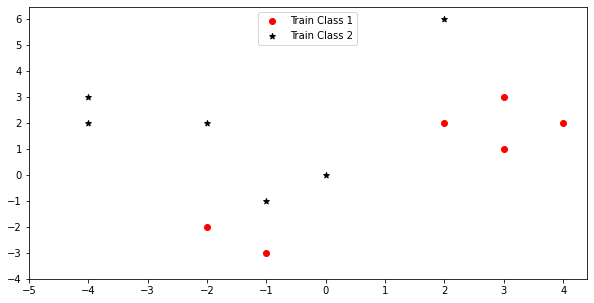

In [ ]:
limit_X1 = class1_X1 + class2_X1
limit_X2 = class1_X2 + class2_X2

plt.figure(figsize = (10, 5))
# Training Data
plt.scatter(class1_X1, class1_X2, label = 'Train Class 1', color = 'red', marker = 'o')
plt.scatter(class2_X1, class2_X2, label = 'Train Class 2', color = 'black', marker = '*')
# Plot Accessory
plt.xticks([i for i in range(min(limit_X1) - 1, max(limit_X1) + 1)])
plt.yticks([i for i in range(min(limit_X2) - 1, max(limit_X2) + 1)])
plt.legend(loc = 'upper center')
plt.show()

## <font color = 'skyblue'>**Assignment Part 2**</font>

### Finding Mean Point

Finding the mean point for the 2 classes and store them in a $2\times2$ matrix.
If mean point of class 1 is $(x_1,y_1)$ and for class 2 is $(x_2, y_2)$ 

\begin{equation*}
means = 
\begin{bmatrix}
x_1 & y_1 \\
x_2 & y_2 \\
\end{bmatrix}
\end{equation*}

Also, a variable *laterPart* is kept that will be used while finding $g(x)$ that is like below

\begin{equation*}
laterPart = 
\begin{bmatrix}
{x_1}^2 + {y_1}^2 & {x_2}^2 + {y_2}^2 \\
\end{bmatrix}\\
\Rightarrow laterPart =
\begin{bmatrix}
point1 & point2
\end{bmatrix}
\end{equation*}

In [ ]:
means = np.zeros((2, 2))

means[0, 0] = np.mean(class1_X1)
means[0, 1] = np.mean(class1_X2)
means[1, 0] = np.mean(class2_X1)
means[1, 1] = np.mean(class2_X2)

laterpartClass1 = np.dot(means[0, :].T, means[0, :])
laterpartClass2 = np.dot(means[1, :].T, means[1, :])
laterPart = np.hstack((np.array(laterpartClass1), np.array(laterpartClass2)))

# # Check values produced
# print(means)
# print(laterpartClass1)
# print(laterpartClass2)
# print(laterPart)

### Calculating $g(x)$
Calculating $g(x)$ for both classes using matrix multiplication.
For ease of calculation, feature matrix $X$ is a $N \times 2$ matrix where $N$ is the number of points for training. Each row of $X$ contains features for one point.

\begin{equation*}
g(x) = X \times means^T - \frac{1}{2} \times lastPart \\
\Rightarrow g(x) = 
\begin{bmatrix}
a_1 & a_2 \\
b_1 & b_2 \\
c_1 & c_2 \\
. & . \\
. & . \\
. & .
\end{bmatrix}
\times
\begin{bmatrix}
x_1 & y_1 \\
x_2 & y_2 \\
\end{bmatrix}^T
- \frac{1}{2} \times
\begin{bmatrix}
point1 & point2
\end{bmatrix}
\end{equation*}

The resulting size of $g(x)$ is $N \times 2$ where each row contains value of $g(x)$ for each of the classes. Column 1 is value for $1^{st}$ class and Column 2 is value for $2^{nd}$ class. The results achieved from here are similar to the one required by the equation given in the assignment

After that, the prediction list is developed by observing which value of $g(x)$ is lower among the two.

In [ ]:
g = np.dot(test_X, means.T) - 0.5 * np.hstack((np.array(laterpartClass1), np.array(laterpartClass2)))
pred = []

for i in g:
  if i[0] > i[1]:
    pred.append(1)
  else:
    pred.append(2)

# # Check values produced
# print(g)
# print(pred)

### Splitting Test into Classes

Splitting the test values into classes as per prediction.

In [ ]:
test_class1_X1, test_class1_X2, test_class2_X1, test_class2_X2 = [], [], [], []

for i in range(test_X.shape[0]):
  if pred[i] == 1:
    test_class1_X1.append(test_X[i, 0])
    test_class1_X2.append(test_X[i, 1])
  else:
    test_class2_X1.append(test_X[i, 0])
    test_class2_X2.append(test_X[i, 1])

### Plotting Predicted Testing Data

Plotting the predicted class based testing data. There are two classes and they are shown.

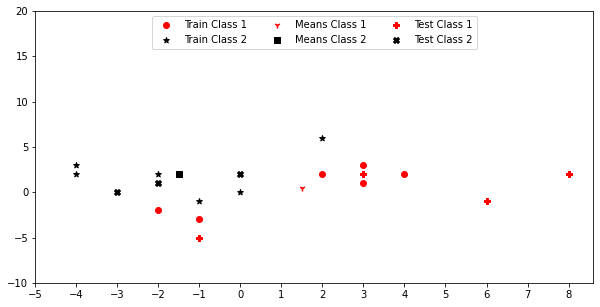

In [ ]:
limit_X1 = limit_X1 + test_class1_X1 + test_class2_X1
limit_X2 = limit_X2 + test_class1_X2 + test_class2_X2

plt.figure(figsize = (10, 5))
#Training Data
plt.scatter(class1_X1, class1_X2, label = 'Train Class 1', color = 'red', marker = 'o')
plt.scatter(class2_X1, class2_X2, label = 'Train Class 2', color = 'black', marker = '*')
# Means Data
plt.scatter(means[0, 0], means[0, 1], label = 'Means Class 1', color = 'red', marker = '1')
plt.scatter(means[1, 0], means[1, 1], label = 'Means Class 2', color = 'black', marker = 's')
# Test Data
plt.scatter(test_class1_X1, test_class1_X2, label = 'Test Class 1', color = 'red', marker = 'P')
plt.scatter(test_class2_X1, test_class2_X2, label = 'Test Class 2', color = 'black', marker = 'X')
# Plot Accessory
plt.xticks([i for i in range(min(limit_X1) - 1, max(limit_X1) + 1)])
plt.yticks([i for i in range(-10, 21, 5)])
plt.legend(ncol = 3, loc = 'upper center')
plt.show()

## <font color = 'skyblue'>**Assignment Part 3**</font>

### Finding Value for Decision Boundary

In order to plot decision boundary, many values of both dimension is taken and was tested against mean point of both classes. If the difference value is found to be less than $0.15$, then it is considered a point in the decision boundary. Such points values are stored.

In [ ]:
boundary_X1 = []
boundary_X2 = []

for i in range(5 * (-10), 5 * (10)):
  for j in range(5 * (-10), 5 * (20)):
    if abs(((means[0, 0] - i / 5) ** 2 + (means[0, 1] - j / 5) ** 2) - ((means[1, 0] - i / 5) ** 2 + (means[1, 1] - j / 5) ** 2)) < 0.15:
      boundary_X1.append(i / 5)
      boundary_X2.append(j / 5)

# # Check values produced
# print(boundary_X1)
# print(boundary_X2)

### Plotting All Data
The final data is plotted alongside decision boundary

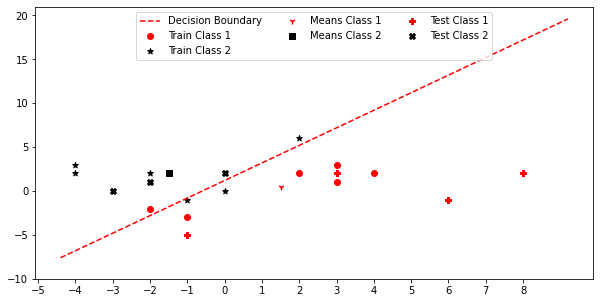

In [ ]:
plt.figure(figsize = (10, 5))
# Decision Boundary
plt.plot(boundary_X1, boundary_X2, label = 'Decision Boundary', color = 'red', linestyle = '--')
#Training Data
plt.scatter(class1_X1, class1_X2, label = 'Train Class 1', color = 'red', marker = 'o')
plt.scatter(class2_X1, class2_X2, label = 'Train Class 2', color = 'black', marker = '*')
# Means Data
plt.scatter(means[0, 0], means[0, 1], label = 'Means Class 1', color = 'red', marker = '1')
plt.scatter(means[1, 0], means[1, 1], label = 'Means Class 2', color = 'black', marker = 's')
# Test Data
plt.scatter(test_class1_X1, test_class1_X2, label = 'Test Class 1', color = 'red', marker = 'P')
plt.scatter(test_class2_X1, test_class2_X2, label = 'Test Class 2', color = 'black', marker = 'X')
# Plot Accessory
plt.xticks([i for i in range(min(limit_X1) - 1, max(limit_X1) + 1)])
plt.yticks([i for i in range(-10, 21, 5)])
plt.legend(ncol = 3, loc = 'upper center')
plt.show()

<font color = 'skyblue'>**Assignmnet Part 4**</font>

### Calculating Accuracy

Calculating the accuracy of prediction

In [ ]:
# # Checking outcome
# print(test_Y == pred)
# print(np.count_nonzero(test_Y == pred))

acc = np.count_nonzero(test_Y == pred) / test_Y.shape[0]
print('Accuracy is: {:.2f}%'.format(acc * 100))

Accuracy is: 85.71%


The final accuract was found to be $85.71\%$ and a total of $6$ points were predicted correctly among the given $7$ test points. \\
<br>
<br>
<font color = 'yellow'> <center>$\Large\text{The End}$</center> </font>